# Hindi Character Recognition Using Convolutional Neural Network

**<h3>About Dataset**


Context

Devanagari is an Indic script used in India and Nepal, and our dataset contains 36 characters and 10 digits. It is differentiable from many other written languages by the lack of capitalization and the horizontal bar aligned along the top of the script. Below are some examples of input used for this project. These are handwritten symbols from the training dataset used to train our model. Note that each of the following is different characters, although some of them appear quite similar - this is the problem that our model will attempt to resolve. Since these are handwritten characters, some amount of error can be attributed to sloppy or perhaps illegible writing - it might not be possible for even a human subject-matter to expect to achieve 100% accuracy.

**Content**

Our training dataset contains 2000 examples of each character, for a total of 92,000 images. Each image consists of 32x32 pixels and 3 color channels. The test set consists of 13800 total images (300 for each character) and the training set consists of 78200 images (1700 per character). This accounts for an 85/15 split.



**Inspiration**

Character recognition (for any language) is important to transcribe the written text into digital representations. For many difficult-to-read handwritten instances of lettering, human intervention is required via methods such as Captcha, Gamification, or manual annotation. This process is often labor and cost-expensive. However, for many character sets, deep learning models can accurately transcribe handwriting to digital encoding

Dataset Source : https://www.kaggle.com/datasets/suvooo/hindi-character-recognition/code

**<h3>Problem Statement :**


To build a deep learning model that can accurately recognize Hindi characters from input images using CNN.



**<h3>Performance Metrics :**

1.    Accuracy
2. Confusion Metrics

**<h3>References :**

 https://medium.com/@Suraj_Yadav/hindi-character-recognition-with-machine-learning-and-deep-learning-56cc4005c433

In [21]:
# Installing useful libraries
! pip install kaggle
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.metrics import accuracy_score,classification_report
from keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Activation, Dropout, Flatten, Dense, BatchNormalization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from tqdm.notebook import tqdm
from dask import bag, diagnostics
from dask.diagnostics import ProgressBar
from PIL import Image

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

The syntax of the command is incorrect.
'cp' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
! chmod 600 ~/.kaggle/kaggle.json

'chmod' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
# Downloading Kaggle Dataset 
!kaggle datasets download --force suvooo/hindi-character-recognition

^C


Dataset URL: https://www.kaggle.com/datasets/suvooo/hindi-character-recognition
License(s): GNU Lesser General Public License 3.0




  0%|          | 0.00/76.1M [00:00<?, ?B/s]
  1%|▏         | 1.00M/76.1M [00:01<01:39, 795kB/s]
  3%|▎         | 2.00M/76.1M [00:01<00:49, 1.58MB/s]
  4%|▍         | 3.00M/76.1M [00:01<00:32, 2.36MB/s]
  5%|▌         | 4.00M/76.1M [00:02<00:28, 2.62MB/s]
  7%|▋         | 5.00M/76.1M [00:02<00:22, 3.25MB/s]
  8%|▊         | 6.00M/76.1M [00:02<00:19, 3.79MB/s]
  9%|▉         | 7.00M/76.1M [00:02<00:18, 3.91MB/s]
 11%|█         | 8.00M/76.1M [00:02<00:16, 4.29MB/s]
 12%|█▏        | 9.00M/76.1M [00:03<00:17, 3.95MB/s]
 13%|█▎        | 10.0M/76.1M [00:03<00:20, 3.40MB/s]
 14%|█▍        | 11.0M/76.1M [00:03<00:21, 3.11MB/s]
 16%|█▌        | 12.0M/76.1M [00:04<00:26, 2.51MB/s]
 17%|█▋        | 13.0M/76.1M [00:05<00:27, 2.41MB/s]
 18%|█▊        | 14.0M/76.1M [00:05<00:26, 2.43MB/s]
 20%|█▉        | 15.0M/76.1M [00:05<00:26, 2.45MB/s]
 21%|██        | 16.0M/76.1M [00:06<00:25, 2.48MB/s]
 22%|██▏       | 17.0M/76.1M [00:06<00:24, 2.51MB/s]
 24%|██▎       | 18.0M/76.1M [00:07<00:23, 2.60MB/s]
 2

In [ ]:
# Unzipping Zipped file
np.random.seed(10)
!unzip '/content/hindi-character-recognition.zip' -d '/content/Hindi Character Recognition'

Streaming output truncated to the last 5000 lines.
  inflating: /content/Hindi Character Recognition/DevanagariHandwrittenCharacterDataset/Train/digit_7/10299.png  
  inflating: /content/Hindi Character Recognition/DevanagariHandwrittenCharacterDataset/Train/digit_7/10300.png  
  inflating: /content/Hindi Character Recognition/DevanagariHandwrittenCharacterDataset/Train/digit_7/10301.png  
  inflating: /content/Hindi Character Recognition/DevanagariHandwrittenCharacterDataset/Train/digit_7/10302.png  
  inflating: /content/Hindi Character Recognition/DevanagariHandwrittenCharacterDataset/Train/digit_7/10303.png  
  inflating: /content/Hindi Character Recognition/DevanagariHandwrittenCharacterDataset/Train/digit_7/10304.png  
  inflating: /content/Hindi Character Recognition/DevanagariHandwrittenCharacterDataset/Train/digit_7/10306.png  
  inflating: /content/Hindi Character Recognition/DevanagariHandwrittenCharacterDataset/Train/digit_7/10307.png  
  inflating: /content/Hindi Character

In [12]:
# Train and Test Directory
train_dir = 'hindi-character-recognition/DevanagariHandwrittenCharacterDataset/Train'
test_dir = 'hindi-character-recognition/DevanagariHandwrittenCharacterDataset/Test'


In [13]:
# Total number of classes in the dataset
classes = os.listdir(train_dir)
print(len(classes))
classes

46


['character_10_yna',
 'character_11_taamatar',
 'character_12_thaa',
 'character_13_daa',
 'character_14_dhaa',
 'character_15_adna',
 'character_16_tabala',
 'character_17_tha',
 'character_18_da',
 'character_19_dha',
 'character_1_ka',
 'character_20_na',
 'character_21_pa',
 'character_22_pha',
 'character_23_ba',
 'character_24_bha',
 'character_25_ma',
 'character_26_yaw',
 'character_27_ra',
 'character_28_la',
 'character_29_waw',
 'character_2_kha',
 'character_30_motosaw',
 'character_31_petchiryakha',
 'character_32_patalosaw',
 'character_33_ha',
 'character_34_chhya',
 'character_35_tra',
 'character_36_gya',
 'character_3_ga',
 'character_4_gha',
 'character_5_kna',
 'character_6_cha',
 'character_7_chha',
 'character_8_ja',
 'character_9_jha',
 'digit_0',
 'digit_1',
 'digit_2',
 'digit_3',
 'digit_4',
 'digit_5',
 'digit_6',
 'digit_7',
 'digit_8',
 'digit_9']

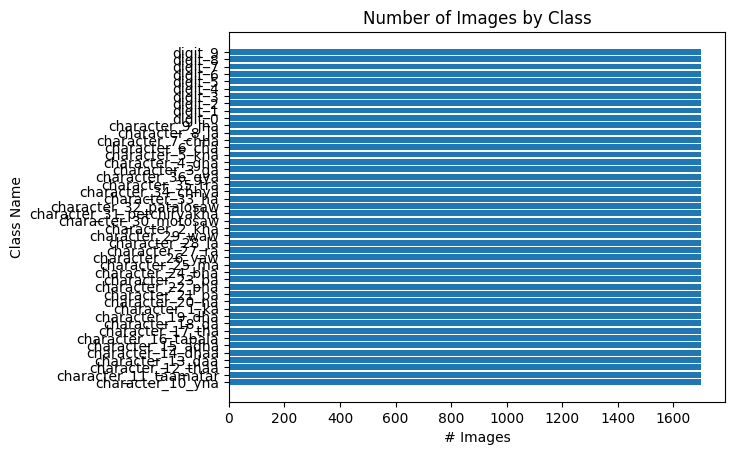

In [14]:
frequencyy = []
frequency = []

# First loop: populate 'frequencyy' with lists of filenames
for class_name in classes:
    class_files = os.listdir(os.path.join(train_dir, class_name))
    frequencyy.append(class_files)

# Second loop: populate 'frequency' with the length of each list in 'frequencyy'
for files in frequencyy:
    frequency.append(len(files))

# Create the dictionary
dataa = dict(zip(classes, frequency))

# Plotting
plt.barh(list(dataa.keys()), list(dataa.values()))
plt.title("Number of Images by Class")
plt.xlabel('# Images')
plt.ylabel('Class Name')
plt.show()

In [27]:
dest = ["hindi-character-recognition/DevanagariHandwrittenCharacterDataset/Train/" + class_name for class_name in classes]
directories = dict(zip(classes, dest))

print(directories)

def get_dims(file):
    print("Called!")
    '''Returns dimensions for an RGB image'''
    try:
        im = Image.open(file)
        arr = np.array(im)
        if len(arr.shape) == 3 and arr.shape[2] == 3:  # Ensure it's an RGB image
            h, w, d = arr.shape
            print(h+" "+w)
            return h, w
        else:
            h, w, d = arr.shape
            print(h+" "+w)
            return h, w
    except Exception as e:
        print(f"Error loading image {file}: {e}")
        return None  # Handle image load error

# Loop through each directory and process images
for class_name, dir_path in directories.items():
    if not os.path.exists(dir_path):
        print(f"Directory does not exist: {dir_path}")
        continue

    filelist = [dir_path + "/" + f for f in os.listdir(dir_path) if os.path.isfile(dir_path + "/" + f) and f.lower().endswith('.png')]
    if not filelist:
        print(f"No valid image files in directory: {dir_path}")
        continue
    print(f"Processing directory: {dir_path}")
    dims = bag.from_sequence(filelist).map(get_dims).filter(lambda x: x is not None)
    get_dims(filelist[0])
    with ProgressBar():
        dims = dims.compute()

    if not dims:
        print(f"No valid dimensions computed for directory: {dir_path}")
        continue

    dim_df = pd.DataFrame(dims, columns=['height', 'width'])
    sizes = dim_df.groupby(['height', 'width']).size().reset_index(name='count')
    sizes.plot.scatter(x='width', y='height')
    plt.title(f'Image Sizes (pixels) | {class_name}')
    plt.xlabel('Width')
    plt.ylabel('Height')
    plt.show()

{'character_10_yna': 'hindi-character-recognition/DevanagariHandwrittenCharacterDataset/Train/character_10_yna', 'character_11_taamatar': 'hindi-character-recognition/DevanagariHandwrittenCharacterDataset/Train/character_11_taamatar', 'character_12_thaa': 'hindi-character-recognition/DevanagariHandwrittenCharacterDataset/Train/character_12_thaa', 'character_13_daa': 'hindi-character-recognition/DevanagariHandwrittenCharacterDataset/Train/character_13_daa', 'character_14_dhaa': 'hindi-character-recognition/DevanagariHandwrittenCharacterDataset/Train/character_14_dhaa', 'character_15_adna': 'hindi-character-recognition/DevanagariHandwrittenCharacterDataset/Train/character_15_adna', 'character_16_tabala': 'hindi-character-recognition/DevanagariHandwrittenCharacterDataset/Train/character_16_tabala', 'character_17_tha': 'hindi-character-recognition/DevanagariHandwrittenCharacterDataset/Train/character_17_tha', 'character_18_da': 'hindi-character-recognition/DevanagariHandwrittenCharacterDat

KeyboardInterrupt: 

Printing some of the images from the train datasets

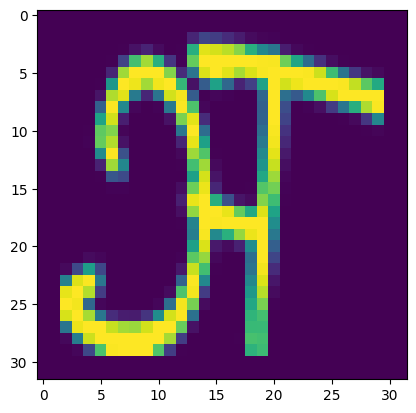

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load image
img = mpimg.imread('/content/Hindi Character Recognition/DevanagariHandwrittenCharacterDataset/Train/character_10_yna/10542.png')

# Display image
plt.imshow(img)
plt.show()

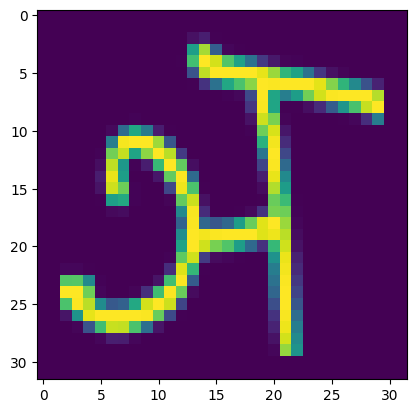

In [ ]:
# Load image
img = mpimg.imread('/content/Hindi Character Recognition/DevanagariHandwrittenCharacterDataset/Train/character_10_yna/10576.png')

# Display image
plt.imshow(img)
plt.show()

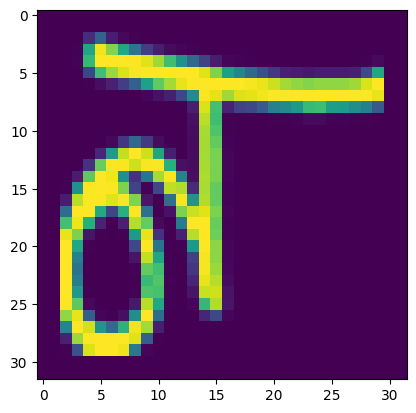

In [ ]:
# Load image
img = mpimg.imread('/content/Hindi Character Recognition/DevanagariHandwrittenCharacterDataset/Train/character_20_na/11061.png')

# Display image
plt.imshow(img)
plt.show()

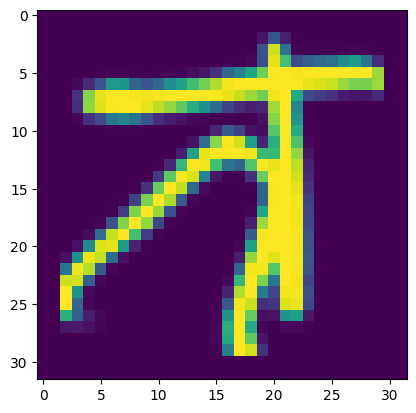

In [ ]:
# Load image
img = mpimg.imread('/content/Hindi Character Recognition/DevanagariHandwrittenCharacterDataset/Train/character_35_tra/102522.png')

# Display image
plt.imshow(img)
plt.show()

In [ ]:
hindi_character = 'ञ ट ठ ड ढ ण त थ द ध क न प फ ब भ म य र ल व ख श ष स ह ॠ त्र ज्ञ ग घ ङ च छ ज झ ० १ २ ३ ४ ५ ६ ७ ८ ९'.split()   

In [ ]:
# Generating Class label
# The names of each character, in the correct order for the Hindi Devnagri script
class_names='''character_1_ka character_2_kha character_3_ga character_4_gha character_5_kna character_6_cha character_7_chha 
character_8_ja character_9_jha character_10_yna character_11_taamatar character_12_thaa character_13_daa character_14_dhaa 
character_15_adna character_16_tabala character_17_tha character_18_da character_19_dha character_20_na character_21_pa 
character_22_pha character_23_ba character_24_bha character_25_ma character_26_yaw character_27_ra character_28_la 
character_29_waw character_30_motosaw character_31_petchiryakha character_32_patalosaw character_33_ha character_34_chhya 
character_35_tra character_36_gya digit_0 digit_1 digit_2 digit_3 digit_4 digit_5 digit_6 digit_7 digit_8 digit_9'''.split()

hindi_character = 'क ख ग घ ङ च छ ज झ ञ ट ठ ड ढ ण त थ द ध न प फ ब भ म य र ल व श ष स ह ॠ त्र ज्ञ ० १ २ ३ ४ ५ ६ ७ ८ ९'.split()    

In [ ]:
# Creating Batches

#Import the data from the directories, then transform them into batches
training_dataset = image_dataset_from_directory(directory=train_dir,
                                                image_size=(32,32),
                                                batch_size=32,
                                                label_mode='categorical')

testting_dataset = image_dataset_from_directory(directory=test_dir,
                                                image_size=(32,32),
                                                batch_size=32,
                                                label_mode='categorical',
                                                shuffle=False)

Found 78200 files belonging to 46 classes.
Found 13800 files belonging to 46 classes.


Modelling

In [ ]:
# Architechture of the CNN

model_1 = tf.keras.Sequential([
               
                tf.keras.Sequential([layers.Rescaling(1./255),]), # # Divide the image array by 255 to normalize it.(Bring the pixel values in the same scale)
                #Layer1
                layers.Conv2D(filters=6 , kernel_size=(5,5) , activation = 'relu' , input_shape = (32,32,3)),
                layers.AveragePooling2D(),

                #Layer2
                layers.Conv2D(filters=16 , kernel_size=(5,5) , activation = 'relu'),
                layers.AveragePooling2D(),
                
                # Flatten the the array 
                layers.Flatten(),

                #Fully Connected Layer 1
                layers.Dense(120 , activation = 'relu'),
                #Fully Connected Layer 2
                layers.Dense(84 , activation = 'relu'),
                #Fully Connected Layer 3
                layers.Dense(len(classes) , activation = 'softmax')  # activation = softmax for multi-class classification              
])

In [ ]:
# Compile Model
model_1.compile(loss = 'categorical_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

In [ ]:

# Model fitting on the loaded dataset
model_1_history = model_1.fit(training_dataset,
                              validation_data = testting_dataset,
                        epochs = 10 ,)

Epoch 1/10
2444/2444 [==============================] - 81s 33ms/step - loss: 0.7239 - accuracy: 0.7946 - val_loss: 0.3089 - val_accuracy: 0.9094
Epoch 2/10
2444/2444 [==============================] - 76s 31ms/step - loss: 0.2434 - accuracy: 0.9262 - val_loss: 0.2031 - val_accuracy: 0.9383
Epoch 3/10
2444/2444 [==============================] - 71s 29ms/step - loss: 0.1681 - accuracy: 0.9473 - val_loss: 0.1744 - val_accuracy: 0.9456
Epoch 4/10
2444/2444 [==============================] - 71s 29ms/step - loss: 0.1276 - accuracy: 0.9596 - val_loss: 0.1682 - val_accuracy: 0.9482
Epoch 5/10
2444/2444 [==============================] - 76s 31ms/step - loss: 0.1057 - accuracy: 0.9660 - val_loss: 0.1499 - val_accuracy: 0.9572
Epoch 6/10
2444/2444 [==============================] - 82s 34ms/step - loss: 0.0860 - accuracy: 0.9721 - val_loss: 0.1568 - val_accuracy: 0.9572
Epoch 7/10
2444/2444 [==============================] - 73s 30ms/step - loss: 0.0732 - accuracy: 0.9761 - val_loss: 0.1601 -

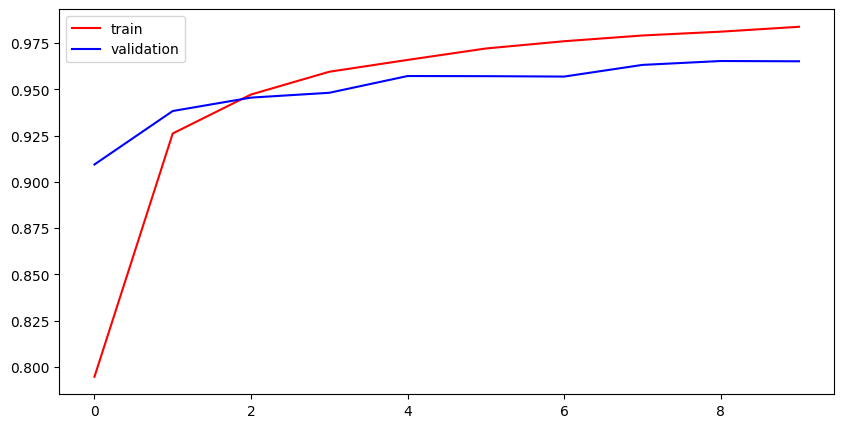

In [ ]:
# graph of validation loss and training data accuracy
import matplotlib.pyplot as plt
plt.figure(1, figsize = (10 , 5))
plt.plot(model_1_history.history['accuracy'],color='red',label='train')
plt.plot(model_1_history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

Model with Batch Normalization and with more convolutional layers

In [ ]:
model = Sequential([layers.Rescaling(1./255),])

#Layer1----------------------------------------------------------
model.add(Convolution2D(filters = 32,
			kernel_size = (3,3),
			strides = 1,
			activation = "relu",
			input_shape = (32,32,1)))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),
			strides=(2, 2),
			padding="same"))

#Layer2-------------------------------------------------------------
model.add(Convolution2D(filters = 32,
			kernel_size = (3,3),
			strides = 1,
			activation = "relu",
			input_shape = (32,32,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),
			strides=(2, 2),
			padding="same"))


#Layers 3-----------------------------------------------------------	
model.add(Convolution2D(filters = 64,
			kernel_size = (3,3),
			strides = 1,
			activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),
			strides=(2, 2),
			padding="same"))


#Layer 4--------------------------------------------------
model.add(Convolution2D(filters = 64,
			kernel_size = (3,3),
			strides= 1,
			activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),
			strides=(2, 2),
			padding="same"))			
model.add(Flatten())

#Fully Connected Layer 1----------------
model.add(Dense(128,
		activation = "relu",
		kernel_initializer = "uniform"))
model.add(BatchNormalization())			

#Fully Connected Layer 2----------------
model.add(Dense(64,
		activation = "relu",
		kernel_initializer = "uniform"))
model.add(BatchNormalization())			

#Fully Connected Layer 3----------------
model.add(Dense(46,
		activation = "softmax",
		kernel_initializer = "uniform"))			


In [ ]:
# Compile Model
model.compile(loss = 'categorical_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

In [ ]:
# Model fitting on the loaded dataset
model_history = model.fit(training_dataset,
                              validation_data = testting_dataset,
                        epochs = 25 ,)

Epoch 1/25
2444/2444 [==============================] - 45s 12ms/step - loss: 0.5096 - accuracy: 0.8719 - val_loss: 0.1394 - val_accuracy: 0.9577
Epoch 2/25
2444/2444 [==============================] - 28s 11ms/step - loss: 0.1376 - accuracy: 0.9579 - val_loss: 0.1042 - val_accuracy: 0.9699
Epoch 3/25
2444/2444 [==============================] - 28s 11ms/step - loss: 0.1028 - accuracy: 0.9683 - val_loss: 0.0951 - val_accuracy: 0.9706
Epoch 4/25
2444/2444 [==============================] - 28s 12ms/step - loss: 0.0797 - accuracy: 0.9748 - val_loss: 0.0675 - val_accuracy: 0.9794
Epoch 5/25
2444/2444 [==============================] - 28s 11ms/step - loss: 0.0647 - accuracy: 0.9796 - val_loss: 0.0738 - val_accuracy: 0.9780
Epoch 6/25
2444/2444 [==============================] - 28s 11ms/step - loss: 0.0586 - accuracy: 0.9817 - val_loss: 0.0688 - val_accuracy: 0.9800
Epoch 7/25
2444/2444 [==============================] - 28s 12ms/step - loss: 0.0488 - accuracy: 0.9843 - val_loss: 0.0795 -

Predicting some Test images

1/1 [==============================] - 0s 19ms/step
Actual_class : फ
Predicted Class :  फ


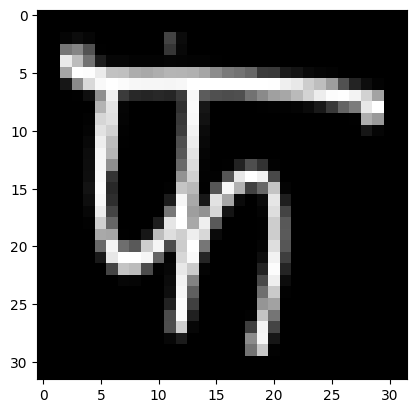

In [ ]:
# predictiting character 22_pha
import cv2
test_img = cv2.imread("/content/Hindi Character Recognition/DevanagariHandwrittenCharacterDataset/Test/character_22_pha/11175.png")
plt.imshow(test_img)
test_img = cv2.resize(test_img,(32,32))
test_input = test_img.reshape((1,32,32,3))
model.predict(test_input)
predicted_probability = model.predict(test_input , verbose=1)
predicted_class = predicted_probability.argmax(axis=1)
class_number = predicted_class[0]
print("Actual_class : फ")
print("Predicted Class : " ,hindi_character[class_number])

1/1 [==============================] - 0s 17ms/step
Actual_class : ३
Predicted Class :  ३


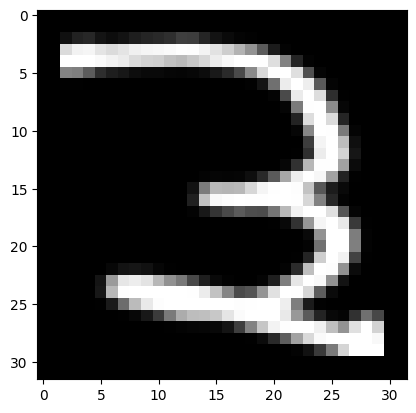

In [ ]:
test_img_2 = test_img = cv2.imread("/content/Hindi Character Recognition/DevanagariHandwrittenCharacterDataset/Test/digit_3/18830.png")
plt.imshow(test_img_2)
test_img_2 = cv2.resize(test_img_2,(32,32))
test_input = test_img_2.reshape((1,32,32,3))
model.predict(test_input)
predicted_probability = model.predict(test_input , verbose=1)
predicted_class = predicted_probability.argmax(axis=1)
class_number = predicted_class[0]
print("Actual_class : ३")
print("Predicted Class : " ,hindi_character[class_number])

1/1 [==============================] - 0s 17ms/step
Actual_class : ५
Predicted Class :  ५


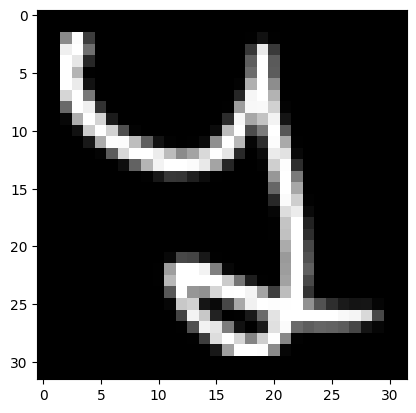

In [ ]:
test_img_2 = test_img = cv2.imread("/content/Hindi Character Recognition/DevanagariHandwrittenCharacterDataset/Test/digit_5/13547.png")
plt.imshow(test_img_2)
test_img_2 = cv2.resize(test_img_2,(32,32))
test_input = test_img_2.reshape((1,32,32,3))
model.predict(test_input)
predicted_probability = model.predict(test_input , verbose=1)
predicted_class = predicted_probability.argmax(axis=1)
class_number = predicted_class[0]
print("Actual_class : ५")
print("Predicted Class : " ,hindi_character[class_number])

1/1 [==============================] - 0s 23ms/step
Actual_class : स
Predicted Class :  स


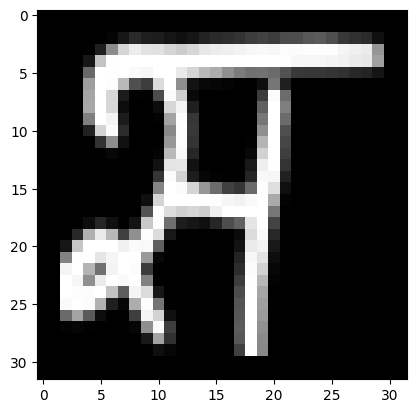

In [ ]:
test_img_2 = test_img = cv2.imread("/content/Hindi Character Recognition/DevanagariHandwrittenCharacterDataset/Test/character_32_patalosaw/23077.png")
plt.imshow(test_img_2)
test_img_2 = cv2.resize(test_img_2,(32,32))
test_input = test_img_2.reshape((1,32,32,3))
model.predict(test_input)
predicted_probability = model.predict(test_input , verbose=1)
predicted_class = predicted_probability.argmax(axis=1)
class_number = predicted_class[0]
print("Actual_class : स")
print("Predicted Class : " ,hindi_character[class_number])

1/1 [==============================] - 0s 19ms/step
Actual_class : न
Predicted Class :  न


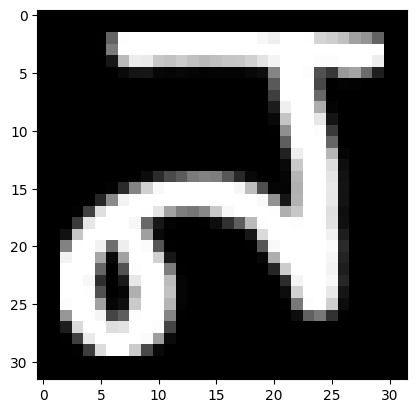

In [ ]:
test_img_2 = test_img = cv2.imread("/content/Hindi Character Recognition/DevanagariHandwrittenCharacterDataset/Test/character_20_na/13017.png")
plt.imshow(test_img_2)
test_img_2 = cv2.resize(test_img_2,(32,32))
test_input = test_img_2.reshape((1,32,32,3))
model.predict(test_input)
predicted_probability = model.predict(test_input , verbose=1)
predicted_class = predicted_probability.argmax(axis=1)
class_number = predicted_class[0]
print("Actual_class : न")
print("Predicted Class : " ,hindi_character[class_number])

1/1 [==============================] - 0s 17ms/step
Actual_class :  ब
Predicted Class :  ब


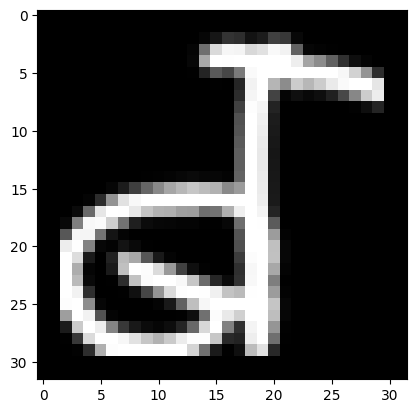

In [ ]:
test_img_2 = test_img = cv2.imread("/content/Hindi Character Recognition/DevanagariHandwrittenCharacterDataset/Test/character_23_ba/17496.png")
plt.imshow(test_img_2)
test_img_2 = cv2.resize(test_img_2,(32,32))
test_input = test_img_2.reshape((1,32,32,3))
model.predict(test_input)
predicted_probability = model.predict(test_input , verbose=1)
predicted_class = predicted_probability.argmax(axis=1)
class_number = predicted_class[0]
print("Actual_class :  ब")
print("Predicted Class : " ,hindi_character[class_number])